In [1]:
import warnings
warnings.filterwarnings('ignore')
import wradlib as wrl
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import PatchCollection
from matplotlib.colors import from_levels_and_colors
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib.cm as cm
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np
import datetime as dt
from osgeo import osr
import numpy as np
import glob

/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationW

In [2]:
#ZP = '201410070235'
ZP = '201803072145'

def read_all_dx(ZP):
    
    from pcc import get_radar_locations

    YYYY, YY, MM, DD, hh, mm = ZP[0:4], ZP[2:4], ZP[4:6], ZP[6:8], ZP[8:10], ZP[10:12]
    #path = '/automount/radar/dwd/dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    path = '/automount/ags/velibor/data/radolan_dx/'+YYYY+'/'+YYYY+'-'+MM+'/'+YYYY+'-'+MM+'-'+DD+'/'+'*'+YY+MM+DD+hh+mm+'*'
    print (path)
    c_liste = sorted(glob.glob(path))
    print (c_liste)
    nr_rad = len(c_liste)

    # Daten Array mit Reflektivitaeten
    all_scans = np.empty((nr_rad,360,128))
    # Atribute
    metadata = [[None] ] * nr_rad

    # Alle Positionen
    all_lon = np.empty((nr_rad,360,128))
    all_lat = np.empty((nr_rad,360,128))
    all_alt = np.empty((nr_rad,360,128))


    for jj in range(nr_rad):
        filename = wrl.util.get_wradlib_data_file(c_liste[jj])
        all_scans[jj], metadata[jj] = wrl.io.readDX(filename)


    radloc = get_radar_locations()

    lon0 = np.empty(nr_rad)
    lat0 = np.empty(nr_rad)
    alt0 = np.empty(nr_rad)
    radname = []

    for rr in range(nr_rad):

        for ir in radloc.keys():

            if str(radloc[ir]['wmo'])==metadata[rr]['radarid']:

                lon0[rr] = radloc[ir]['lon']
                lat0[rr] = radloc[ir]['lat']
                alt0[rr] = radloc[ir]['alt']
                radname.append(radloc[ir]['name'])
            else:
                pass
    #get_radar_locations()
    print (lon0)
    print (lat0)
    print (alt0)
    print (radname)


    proj_stereo = wrl.georef.create_osr("dwd-radolan")
    proj_wgs = osr.SpatialReference()
    proj_wgs.ImportFromEPSG(4326)

    for rrr in range(nr_rad):

        radar_location = (lon0[rrr], lat0[rrr], alt0[rrr])

        azimuths = metadata[rrr]['azim']
        ranges = r = np.arange(0,128)*1000
        elevations = metadata[rrr]['elev']
        #########
        polargrid = np.meshgrid(ranges, azimuths)
        elevgrid = np.meshgrid(ranges, elevations)

        grid = wrl.georef.polar.spherical_to_proj(polargrid[0], polargrid[1],elevgrid[1], radar_location)

        lon, lat, alt = grid[:,:,0], grid[:,:,1], grid[:,:,2]

        lon, lat = wrl.georef.reproject(lon, lat, projection_target=proj_stereo ,projection_source=proj_wgs)

        all_lon[rrr,:,:] = lon
        all_lat[rrr,:,:] = lat
        all_alt[rrr,:,:] = alt


    return all_lon, all_lat, all_alt, all_scans

In [3]:

all_lon, all_lat, all_alt, all_scans = read_all_dx(ZP)

/automount/ags/velibor/data/radolan_dx/2018/2018-03/2018-03-07/*1803072145*
['/automount/ags/velibor/data/radolan_dx/2018/2018-03/2018-03-07/raa00-dx_10103-1803072145-asb---bin', '/automount/ags/velibor/data/radolan_dx/2018/2018-03/2018-03-07/raa00-dx_10132-1803072145-boo---bin', '/automount/ags/velibor/data/radolan_dx/2018/2018-03/2018-03-07/raa00-dx_10339-1803072145-hnr---bin', '/automount/ags/velibor/data/radolan_dx/2018/2018-03/2018-03-07/raa00-dx_10356-1803072145-umd---bin', '/automount/ags/velibor/data/radolan_dx/2018/2018-03/2018-03-07/raa00-dx_10392-1803072145-pro---bin', '/automount/ags/velibor/data/radolan_dx/2018/2018-03/2018-03-07/raa00-dx_10440-1803072145-fld---bin', '/automount/ags/velibor/data/radolan_dx/2018/2018-03/2018-03-07/raa00-dx_10488-1803072145-drs---bin', '/automount/ags/velibor/data/radolan_dx/2018/2018-03/2018-03-07/raa00-dx_10557-1803072145-neu---bin', '/automount/ags/velibor/data/radolan_dx/2018/2018-03/2018-03-07/raa00-dx_10605-1803072145-nhb---bin', '/aut

In [4]:
all_lon.shape, all_scans.shape

/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


((12, 360, 128), (12, 360, 128))

In [5]:
all_lon.shape

(12, 360, 128)

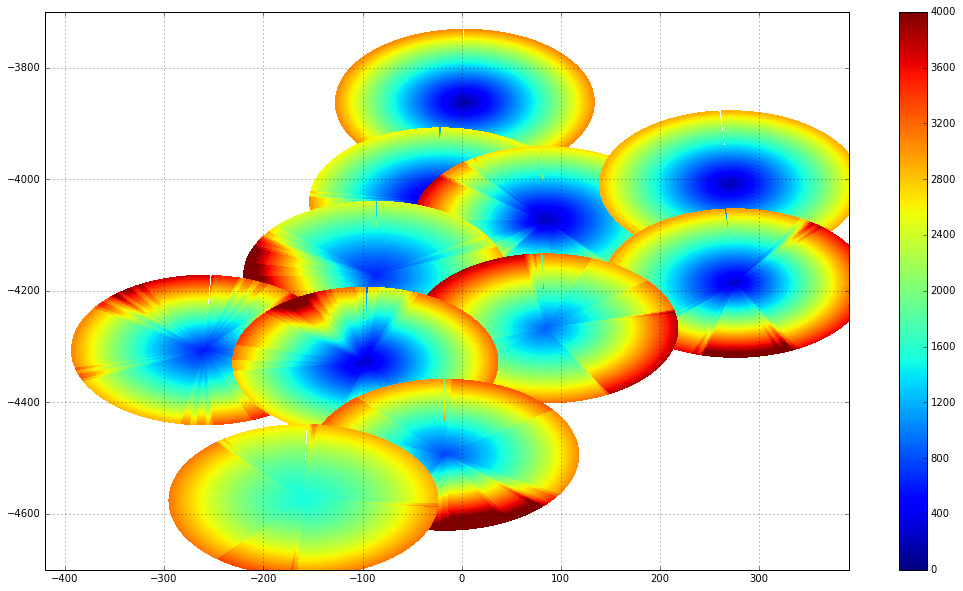

In [6]:
plt.figure(figsize=(18,10))

for plpl in range(all_lon.shape[0]):
    plt.pcolormesh(all_lon[plpl,...], all_lat[plpl,...], all_alt[plpl,...], vmin=0, vmax=4000)

plt.xlim(-420,390)
plt.ylim(-4700, -3700)
plt.colorbar()
plt.grid()